In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from scipy.stats import ttest_rel
import networkx as nx
import itertools

In [8]:
path = 'data_sets/De-noised_100G_9T_300cPerT_4_DS1/'
input_file_targets=  path + 'Interaction_cID_4.txt'
input_file_regs= path + 'Regs_cID_4.txt'

read the topology files

In [9]:
with open(input_file_targets) as f:
    input_targets = []
    reader = csv.reader(f, delimiter="\t")
    for line in reader:
        input_targets+=[line[0].split(',')]
with open(input_file_regs) as f:
    input_regs = []
    reader = csv.reader(f, delimiter="\t")
    for line in reader:
        input_regs+=[line[0].split(',')]
input_regs = np.asarray(input_regs,dtype = float)

In [16]:
len(input_targets)

93

In [11]:
def text_parser(input_file_targets):
    with open(input_file_targets) as f:
        input_targets = []
        reader = csv.reader(f, delimiter="\t")
        for line in reader:
            input_targets+=[line[0].split(',')]
    return input_targets
        
def convert_interaction_net_to_networkx(input_file_targets=None,input_targets=None):
    '''This function converts the input text file of interaction into a networkx object'''

    if input_file_targets is None and  input_targets is None:
        raise ValueError('Pass one argument only, not both')
    elif input_targets is None:
        input_targets = text_parser(input_file_targets)
    G = nx.DiGraph()
    for unformatted in input_targets:
        i = float(unformatted[0])
        in_degree = float(unformatted[1])
        if i.is_integer()&in_degree.is_integer():
            i = int(i)
            in_degree = int(in_degree)
        else:
            raise ValueError('1st and 2nd column of '+input_file_taregts+" should be integers, but they aren't")

        neighbours  = np.rint(np.array(unformatted[2:2+in_degree],dtype=float)).astype(int)
        interaction = np.array(unformatted[2+in_degree:2+2*in_degree],dtype = float)
        G.add_weighted_edges_from(list(zip(neighbours,[i]*in_degree,interaction)))#neighbours are the genes pointing to i
    return G
G = convert_interaction_net_to_networkx(input_file_targets)

In [12]:
def networkx_2_input_reg(G,hill_coef = 2):
    data = []
    for i,k in G.in_degree():
        if k>0:
            to,_,c = list(zip(*G.in_edges(i,data = True)))
            inter = [temp['weight'] for temp in c]
            G.in_edges(i,data = True)
            data+=[list(itertools.chain.from_iterable([[i],[k],to,inter,[hill_coef]]))]
    return data
data = networkx_2_input_reg(G,hill_coef = 2)

<AxesSubplot:ylabel='Count'>

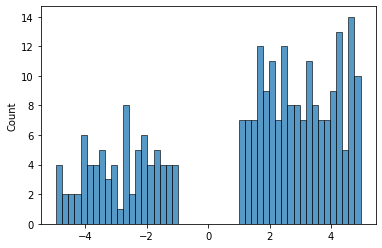

In [47]:
sns.histplot([c['weight'] for a,b,c in G.edges(data = True)],bins =50)

In [34]:
input_targets

[['53.0',
  '5.0',
  '1.0',
  '14.0',
  '67.0',
  '74.0',
  '62.0',
  '1.7310389942765454',
  '2.641368643483525',
  '2.419502251829988',
  '-3.2654552986344143',
  '-3.0023322853469634',
  '2.0',
  '2.0',
  '2.0',
  '2.0',
  '2.0'],
 ['80.0',
  '5.0',
  '1.0',
  '14.0',
  '67.0',
  '74.0',
  '62.0',
  '2.3430934515877397',
  '3.3494546372263074',
  '2.7645183047916633',
  '-1.6058094350729624',
  '-1.7050461372736212',
  '2.0',
  '2.0',
  '2.0',
  '2.0',
  '2.0'],
 ['54.0',
  '5.0',
  '1.0',
  '14.0',
  '67.0',
  '74.0',
  '62.0',
  '4.003261994785651',
  '4.810459330626347',
  '3.3009329334318407',
  '-1.8746688637440818',
  '-3.341611284465473',
  '2.0',
  '2.0',
  '2.0',
  '2.0',
  '2.0'],
 ['60.0',
  '5.0',
  '1.0',
  '14.0',
  '67.0',
  '74.0',
  '62.0',
  '2.0193637486461338',
  '4.012549297435173',
  '4.624595838405661',
  '-4.016603903793964',
  '-1.760143845088722',
  '2.0',
  '2.0',
  '2.0',
  '2.0',
  '2.0'],
 ['98.0',
  '5.0',
  '1.0',
  '14.0',
  '67.0',
  '74.0',
  '62.0

In [106]:
hill_coef

NameError: name 'hill_coef' is not defined